In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from mlxtend.plotting import plot_decision_regions

## Section 01:- Reading Data and Checking the Meta information

In [2]:
df = pd.read_csv('../input/drug-addiction-in-bangladesh-reasons/drugAddiction.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             211 non-null    object
 1   Gender                          211 non-null    object
 2   Education                       211 non-null    object
 3   Enjoyable with-                 211 non-null    object
 4   Live with                       211 non-null    object
 5   Conflict with law               211 non-null    object
 6   Motive about drug               211 non-null    object
 7   Spend most time                 211 non-null    object
 8   Failure in life                 211 non-null    object
 9   Mental/emotional problem        211 non-null    object
 10  Suicidal thoughts               211 non-null    object
 11  Family relationship             211 non-null    object
 12  Financials of family            211 non-null    ob

,Age,Gender,Education,Enjoyable with-,Live with,Conflict with law,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,...,friends� houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
count,211,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,211
unique,4,2,5,3,2,2,7,3,2,17,...,3,2,2,3,3,2,2,3,2,4
top,between 22 to 35 years,Male,Undergraduate,I have no idea,With Family/Relatives,No,Should avoid,Friends,Yes,Depression/ inferiority/Guilt,...,Sometimes,Yes,No,No,"Yes, every day.",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable
freq,122,142,132,122,130,159,83,127,109,44,...,111,132,184,125,90,114,134,83,157,110


## Section 02:- EDA

In [3]:
df[df.duplicated()].count()

Age                               6
Gender                            6
Education                         6
Enjoyable with-                   6
Live with                         6
Conflict with law                 6
Motive about drug                 6
Spend most time                   6
Failure in life                   6
Mental/emotional problem          6
Suicidal thoughts                 6
Family relationship               6
Financials of family              6
Addicted person in family         6
no. of friends                    6
Withdrawal symptoms               6
friends� houses at night          6
Satisfied with workplace          6
Case in court                     6
Living with drug user             6
Smoking                           6
Ever taken drug                   6
Friends influence                 6
If chance given to taste drugs    6
Easy to control use of drug       6
Frequency of drug usage           6
dtype: int64

<AxesSubplot:xlabel='Suicidal thoughts', ylabel='count'>

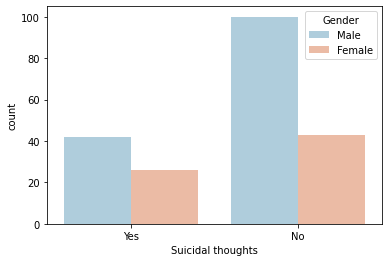

In [4]:
sns.countplot(x='Suicidal thoughts',hue='Gender',data=df,palette='RdBu_r')

* <h4> <b> From the above plot we see suicidal thoughts are more in Male compared to Female.</b></h4>

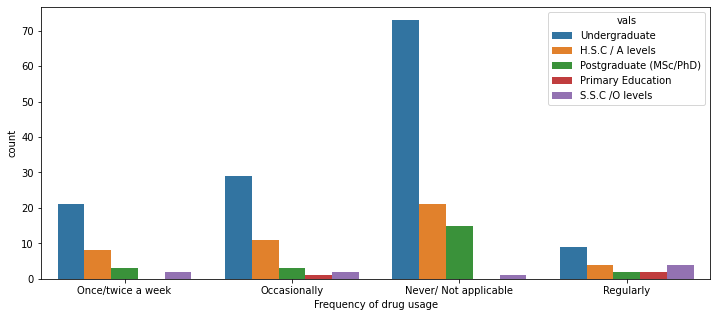

In [5]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Education'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

* <h4> <b> From the above plot we see Regular usage of Drug is more common in undergraduates than compared to others</b></h4>

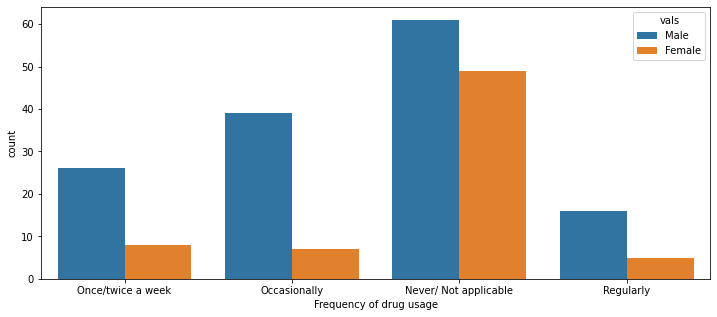

In [6]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Gender'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

* <h4> <b> From the above plot we see Regularly usage of drug is more in Male compared to Female.</b></h4>

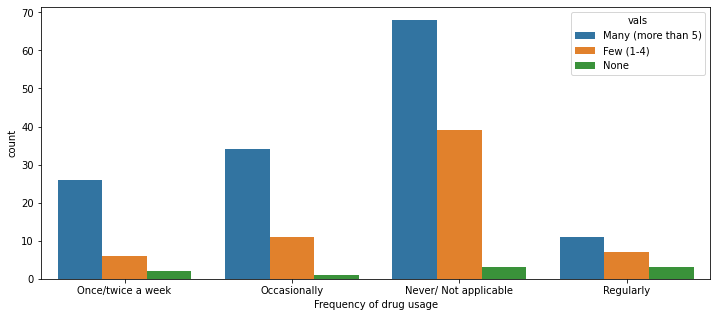

In [7]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['no. of friends'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

* <h4> <b> From the above plot we see Regularly usage of drug is more when person is having more than 5 friends.</b></h4>

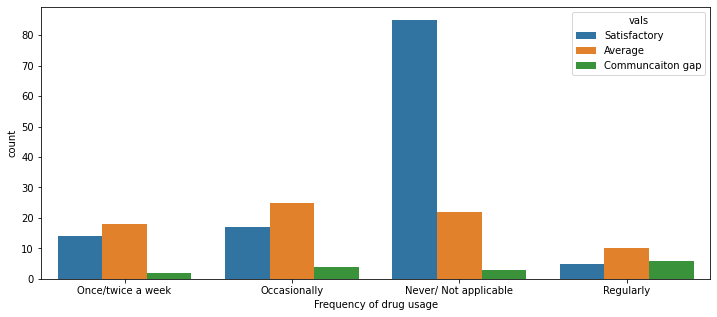

In [8]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Family relationship'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

* <h4> <b> From the above plot we see Regularly usage of drug is more in person whose Family relationship is average.</b></h4>

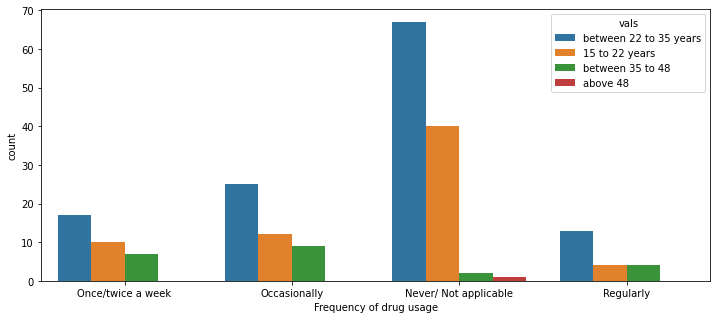

In [9]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Age'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

* <h4> <b> From the above plot we see Regularly usage of drug is more between age group of 22 to 35</b></h4>

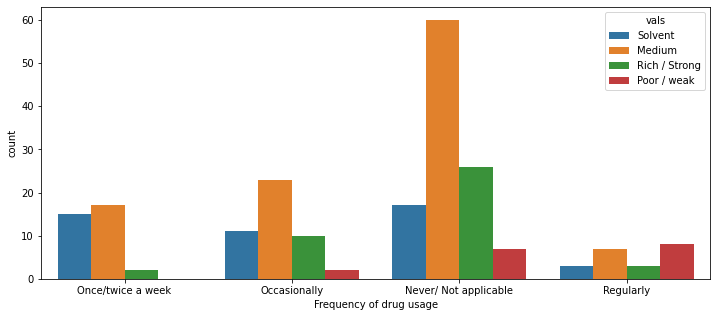

In [10]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Financials of family'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

* <h4> <b> From the above plot we see Regularly usage of drug is more in people belonging to Poor/weak section of society</b></h4>

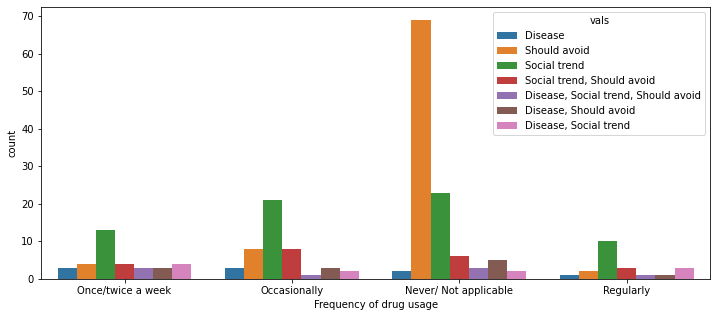

In [11]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Motive about drug'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

* <h4> <b> From the above plot we see Regularly usage of drug is more in people who are influenced by social trends</b></h4>

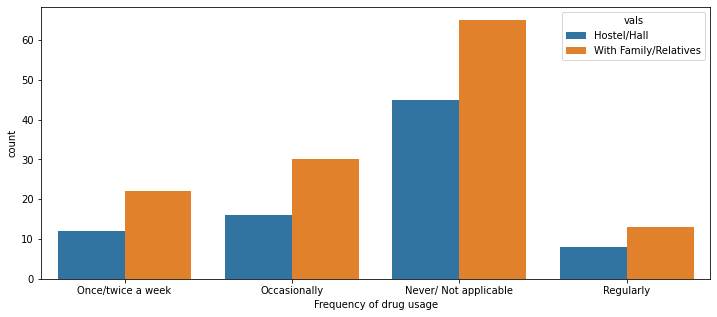

In [12]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Live with'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

* <h4> <b> From the above plot we see Regularly usage of drug is more in people who stay with their Family</b></h4>

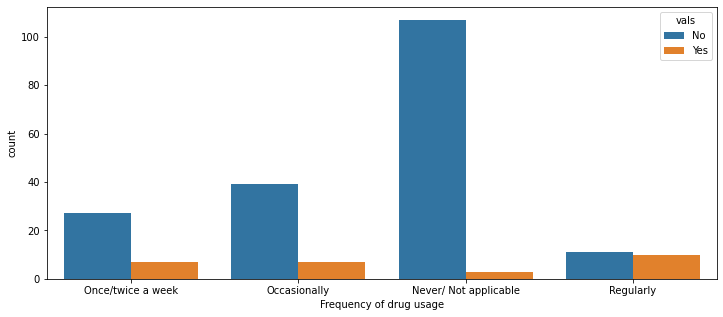

In [13]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Case in court'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

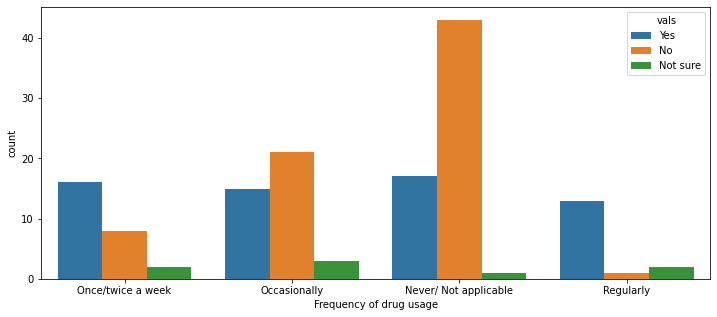

In [14]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Living with drug user'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[df['Gender']=='Male'])

* <h4> <b> From the above plot we see Regularly usage of drug is more in MALE if their friends are used to the drugs</b></h4>

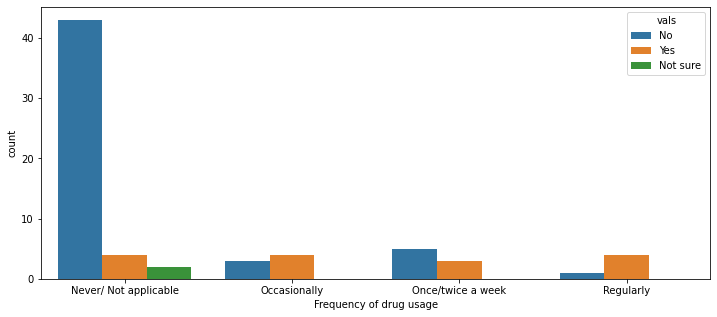

In [15]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Living with drug user'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])



* <h4> <b> From the above plot we see Regularly usage of drug Same like Male's Female's are influenced if they are in toch with friend who is regularly using it.</b></h4>

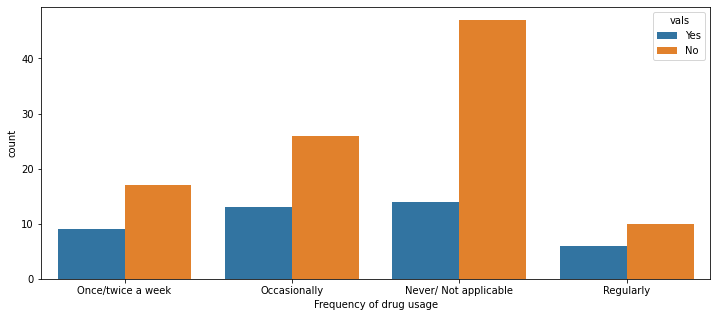

In [16]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Suicidal thoughts'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

* <h4> <b> From the above plot we see Suicidal Ideation is less in Male who are Regularly users of drug </b></h4>

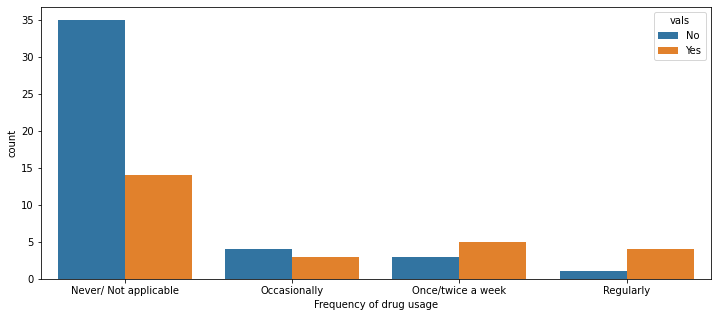

In [17]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Suicidal thoughts'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])

* <h4> <b> From the above plot we see Suicidal Ideation is MORE in Female who are Regular users of drug </b></h4>

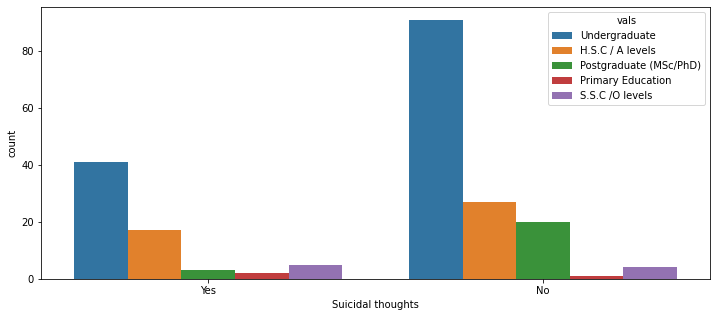

In [18]:
df01 = df.melt( id_vars=['Suicidal thoughts'],value_vars=['Education'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Suicidal thoughts", hue='vals', data=df01)

* <h4> <b> From the above plot we see Suicidal Ideation is MORE if the person is Under graduate </b></h4>

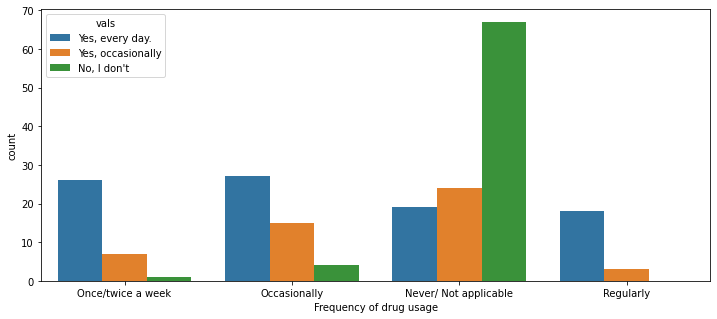

In [19]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Smoking'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

* <h4> <b> From the above plot we see Regular usage is more in people who are regular/everyday smokers, Intresting fact from the plot is if the person dont smoke he/she may not get in to the Regular usage of drug </b></h4>

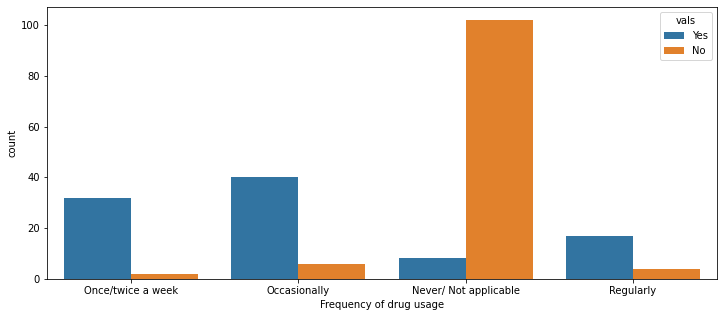

In [20]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Ever taken drug'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

* <h4> <b> Regulary usage of Drug from the above plot is bit contradictory since few people have answered Ever taken drug to NO but still they have answered as they are regular users of Drug </b></h4>

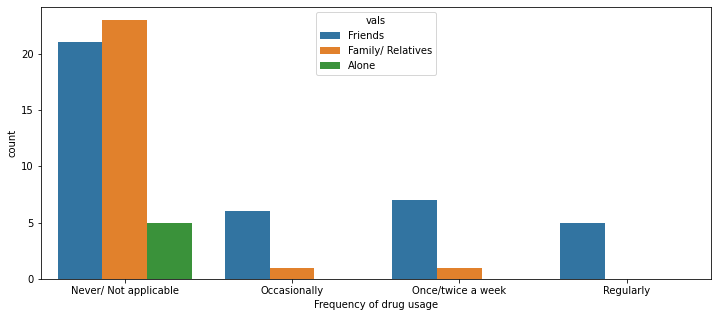

In [21]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Spend most time'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])

* <h4> <b> From the above plot we see Regular usage of drug in Female spends most of time with Friends,One intresting fact to notice is if you spend most of time with Family/Relatives you are most likely not get addicted </b></h4>

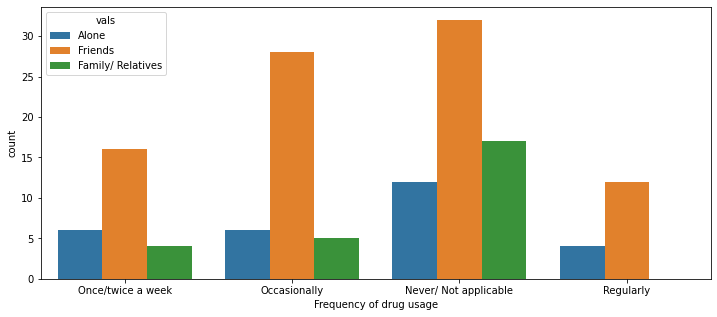

In [22]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Spend most time'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

* <h4> <b> From the above plot we see Regular usage of drug in Male spends most of time with Friends.One intresting fact to notice is if you spend most of time with Family/Relatives you are most likely not get addicted  </b></h4>

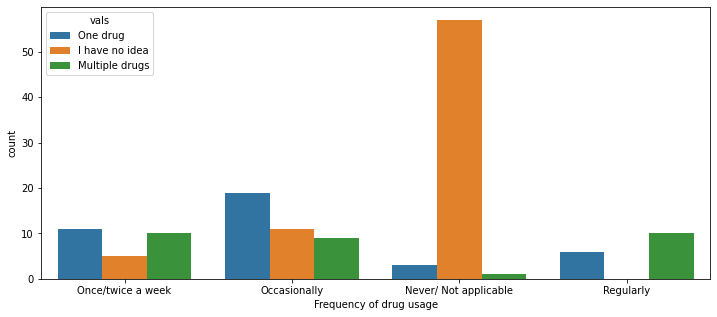

In [23]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Enjoyable with-'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

* <h4> <b> From the above plot we see Regular usage of drug in Male are in to usage of multiple drugs </b></h4>

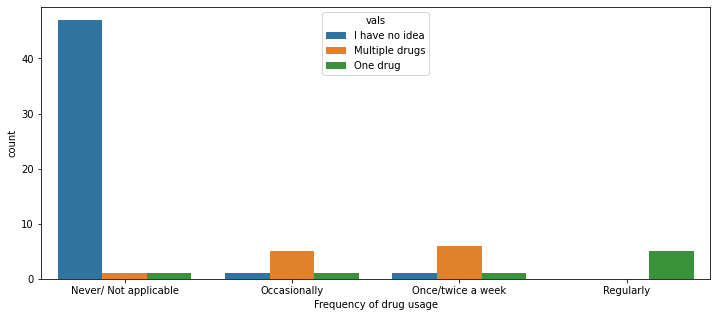

In [24]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Enjoyable with-'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])

* <h4> <b> From the above plot we see Regular usage of drug in Female are in to usage of ONE drug </b></h4>

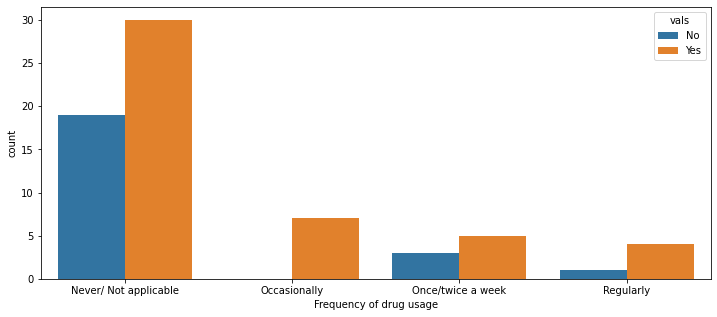

In [25]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Satisfied with workplace'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])

* <h4> <b> From the above plot we see Regular usage of drug in Female those who are Satisfied with their work in work place</b></h4>

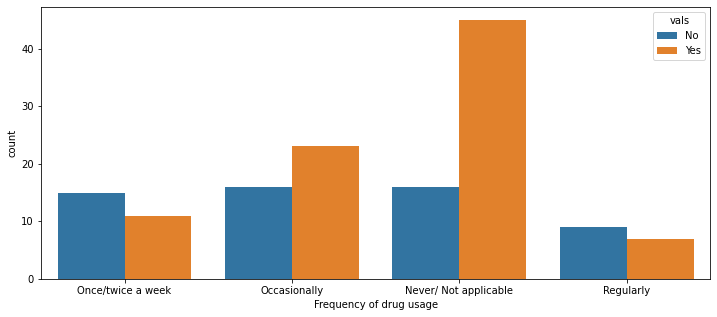

In [26]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Satisfied with workplace'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

 * <h4> <b> From the above plot we see Regular usage of drug in Male are those who are NOT Satisfied with their work in work place</b></h4>

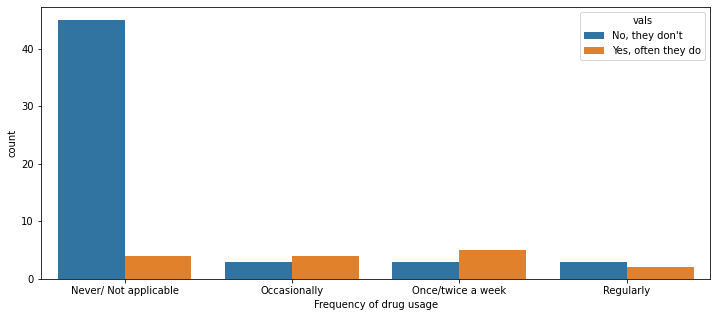

In [27]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Friends influence'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])

* <h4> <b> From the above plot we see Regular usage of drug in Female are those who are NOT influenced by their friends</b></h4>

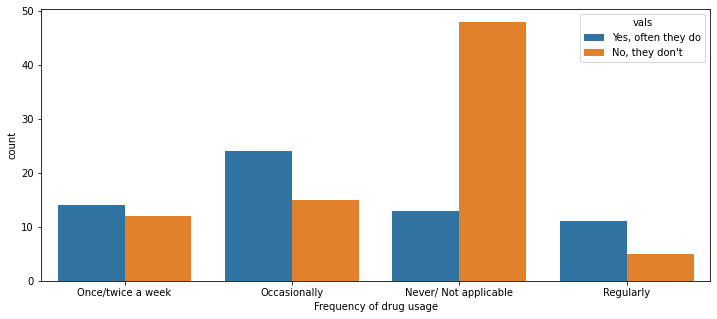

In [28]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Friends influence'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])

* <h4> <b> From the above plot we see Regular usage of drug in Male are those who are influenced by their friends</b></h4>

### One hot Encoding the columns

In [29]:
dfclassification=df.copy()
dfclassification['Suicidal thoughts']=dfclassification[['Suicidal thoughts']].apply(lambda x:x.map({'Yes':1,'No':0}))
dfclassification['Gender']=dfclassification[['Gender']].apply(lambda x:x.map({'Male':1,'Female':0}))
dfclassification['Failure in life']=dfclassification[['Failure in life']].apply(lambda x:x.map({'Yes':1,'No':0}))

In [30]:
mylist = list(dfclassification.select_dtypes(include=['object']).columns)
dummy1=pd.get_dummies(dfclassification[mylist],drop_first=True)
dfclassificationFinal = pd.concat([dummy1,dfclassification['Suicidal thoughts'],dfclassification['Gender'],dfclassification['Failure in life']], axis=1)
from sklearn import preprocessing
X = dfclassificationFinal.drop('Suicidal thoughts',axis=1).values
y = dfclassificationFinal['Suicidal thoughts'].values

## Section 03:- Splitting the Data Equally in to X_train and X_test(Stratified logic)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.5,random_state=2,stratify=y)

train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=71, 1=34, Test: 0=72, 1=34


## Section 04:- Model Building


### <b>Model 01:- Support Vector Machine (SVM)</b>

In [32]:
model=SVC()
model.fit(X_train,y_train)
print(f' Training Accuracy is:- {model.score(X_train,y_train)}')
f'Test Accuracy is:- {model.score(X_test,y_test)}'

 Training Accuracy is:- 0.8761904761904762


'Test Accuracy is:- 0.6981132075471698'


### <b>Model 02:- KNN without Hyper parameter tuning</b>


 Best Test accuracy is:-  0.7358490566037735


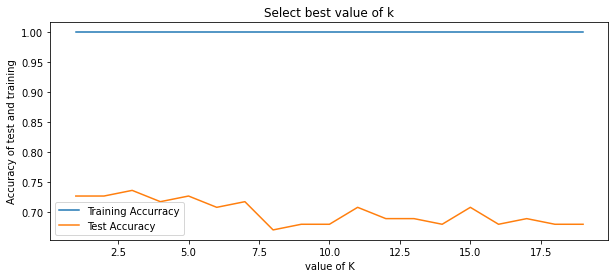

In [33]:

k = range(1,20)
trainingAccuracy = []
testAccuracy=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=15,p=1,weights='distance')
    knn.fit(X_train,y_train)
    trainingacc = knn.score(X_train,y_train)
    trainingAccuracy.append(trainingacc)
    testAccuracy.append(knn.score(X_test,y_test))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.xlabel("value of K")
plt.ylabel("Accuracy of test and training")
plt.title("Select best value of k")
plt.plot(k,trainingAccuracy)
plt.plot(k,testAccuracy)
  #axes[0].legend(['loss','val_loss'])
axes.legend(["Training Accurracy","Test Accuracy"])
print("\n Best Test accuracy is:- ",max(testAccuracy))


### <b>Model 02:- KNN With Hyper parameter tuning</b>

In [34]:
k_range = list(range(1,50))
weight_options = ["uniform", "distance"]
pe=[1,2]

param_grid = dict(n_neighbors = k_range, weights = weight_options,p=pe)
knn = KNeighborsClassifier()
knngrid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy',n_jobs=15)
knngrid.fit(X_train,y_train)

print ("Best score on 10 folds split Data on Train split is :- ",knngrid.best_score_)
print ("\n Best Param:- ",knngrid.best_params_)
print ("\n Best KNN Metric:- ", knngrid.best_estimator_)

print(f' \n Training Accuracy {knngrid.score(X_train,y_train)}')
f'Test Accuracy {knngrid.score(X_test,y_test)}'

Best score on 10 folds split Data on Train split is :-  0.7990909090909091

 Best Param:-  {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

 Best KNN Metric:-  KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')
 
 Training Accuracy 1.0


'Test Accuracy 0.6698113207547169'

Text(69.0, 0.5, 'Truth')

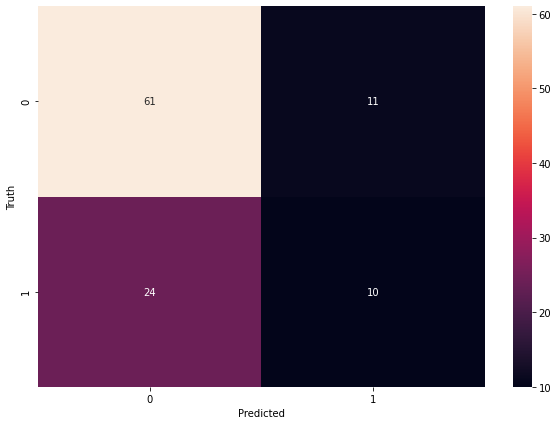

In [35]:
y_predicted = knngrid.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')


### <b>Model 03:- Logistic Regression</b>

In [36]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

log_model.fit(X_train, y_train)
print(f' Training Accuracy {log_model.score(X_train,y_train)}')
f'Test Accuracy {log_model.score(X_test,y_test)}'

 Training Accuracy 0.8476190476190476


'Test Accuracy 0.7735849056603774'


### <b>Model 04:- Neural Network</b>

In [37]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],            
        }
       ]
clf = GridSearchCV(MLPClassifier(), param_grid, cv=folds,
                           scoring='accuracy',n_jobs=-1,verbose = 1,
)
clf.fit(X_train, y_train)
print(f' Training Accuracy {clf.score(X_train,y_train)}')
f'Test Accuracy {clf.score(X_test,y_test)}'

Fitting 5 folds for each of 12 candidates, totalling 60 fits
 Training Accuracy 0.7523809523809524


'Test Accuracy 0.6792452830188679'

In [38]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results[cv_results.rank_test_score<5]
#print the optimum value of hyperparameters
print('Best hyperparameters: ', clf.best_params_)

Best hyperparameters:  {'activation': 'tanh', 'solver': 'sgd'}



### <b>Model 04:- Neural Network with Dense layers</b>

In [39]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>= 1.0):
      print("\nReached 100% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(800, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50,batch_size=32,callbacks=[callbacks])
print("accuracy on test data is", model.evaluate(X_test, y_test))

Epoch 1/50
4/4 [==============================] - 1s 9ms/step - loss: 2.0904 - accuracy: 0.3377
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 0.9855 - accuracy: 0.7174
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 0.6131 - accuracy: 0.7076
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 0.6163 - accuracy: 0.6226
Epoch 5/50
4/4 [==============================] - 0s 6ms/step - loss: 0.4516 - accuracy: 0.8175
Epoch 6/50
4/4 [==============================] - 0s 7ms/step - loss: 0.4118 - accuracy: 0.8321
Epoch 7/50
4/4 [==============================] - 0s 6ms/step - loss: 0.3260 - accuracy: 0.8935
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 0.2676 - accuracy: 0.8907
Epoch 9/50
4/4 [==============================] - 0s 6ms/step - loss: 0.2600 - accuracy: 0.9178
Epoch 10/50
4/4 [==============================] - 0s 6ms/step - loss: 0.2127 - accuracy: 0.8970
Epoch 11/50
4/4 [======================

### Spot Check Using Different Algorithms

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import precision_score

models =[("SVC", SVC()),
         ('KNN',KNeighborsClassifier()),("DTC", DecisionTreeClassifier()),
         ("GNB", GaussianNB()),("SGDC", SGDClassifier()),("Perc", Perceptron()),
         ("NC",NearestCentroid()),("Ridge", RidgeClassifier()),
         ("BNB", BernoulliNB()),('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
         ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]
pred = []
names = []
modelsprecision = []

for name,model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    score = precision_score(y_test, prediction,average = 'macro')
    pred.append(score)
    names.append(name)
    modelsprecision.append((name,score))
    
modelsprecision.sort(key=lambda k:k[1],reverse=True)

modelsprecision

[('SGDC', 0.7188644688644689),
 ('Perc', 0.707219878105954),
 ('ADA', 0.7012383900928792),
 ('PAC', 0.6958724202626643),
 ('KNN', 0.6838658983761132),
 ('Ridge', 0.6777777777777778),
 ('XGB', 0.6752450980392157),
 ('RF', 0.6572897761645493),
 ('SVC', 0.6480496453900709),
 ('BNB', 0.6231388329979879),
 ('NC', 0.6214470284237726),
 ('DTC', 0.5669934640522876),
 ('GNB', 0.3354591836734694)]

## Conclusion:-
* Logistic regression proved to be the good modal compared to others with 77% Accuracy on Test Data.

## Future work:-
This data can be explored with clustering algorithms to find out the pattern among different clusters.